# Use case 2 - Bryan Benisti, Daniel Belhassen, Ethan Zerbib and Lenny Amar

###### libraries and loading of dataset 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252', 'utf-16', 'utf-32', 'ascii']
for enc in encodings:
    try:
        df = pd.read_csv("//Users/bryanbenisti/Desktop/Jupyter_Notebook/Data_course/Homework2/songs1-2023.csv", encoding=enc)
        print(f'Success with encoding: {enc}')
        break
    except UnicodeDecodeError:
        print(f'Error with encoding: {enc}')


Success with encoding: utf-8


In [4]:
df = pd.read_csv("/Users/bryanbenisti/Desktop/Jupyter_Notebook/Data_course/Homework2/songs1-2023.csv")    


In [5]:
pd.set_option('display.max_columns',35) #To display the whole dataset


## Data Cleaning

In [27]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [28]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.530000e+02,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.135979e+08,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.668039e+08,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.413817e+08,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.902286e+08,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738011e+08,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    int64 
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [30]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [6]:
# Handling missing values
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(0)  # Assuming songs not charted on Shazam are marked as 0
df['key'] = df['key'].fillna('Unknown')  # Marking unknown musical keys as 'Unknown'

# Verifying the changes
missing_values_after_cleaning = df.isnull().sum()
missing_values_after_cleaning[missing_values_after_cleaning > 0]


Series([], dtype: int64)

In [7]:
# Fill NaN values with 0 and convert to int64
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'].str.replace(',', ''), errors='coerce').fillna(0).astype(int)
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'].str.replace(',', ''), errors='coerce').fillna(0).astype(int)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    int64 
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    int64 
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      953 non-null    int64 
 14  bpm                   953 non-null    int64 
 15  key                   953 non-null    ob

In [9]:
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
genre                   0
genre_deezer            0
dtype: int64

For in_shazam_charts, the missing values could indicate that the song was not charted on Shazam. We might consider filling these missing values with a number that represents "not charted" or "0" if that makes sense in the context.

For key, the missing values could be more problematic since it's a categorical variable representing the musical key of a track. Imputing a mode or a specific category might introduce bias or inaccuracies.

## Data Visualization and Analysis

### General Overview

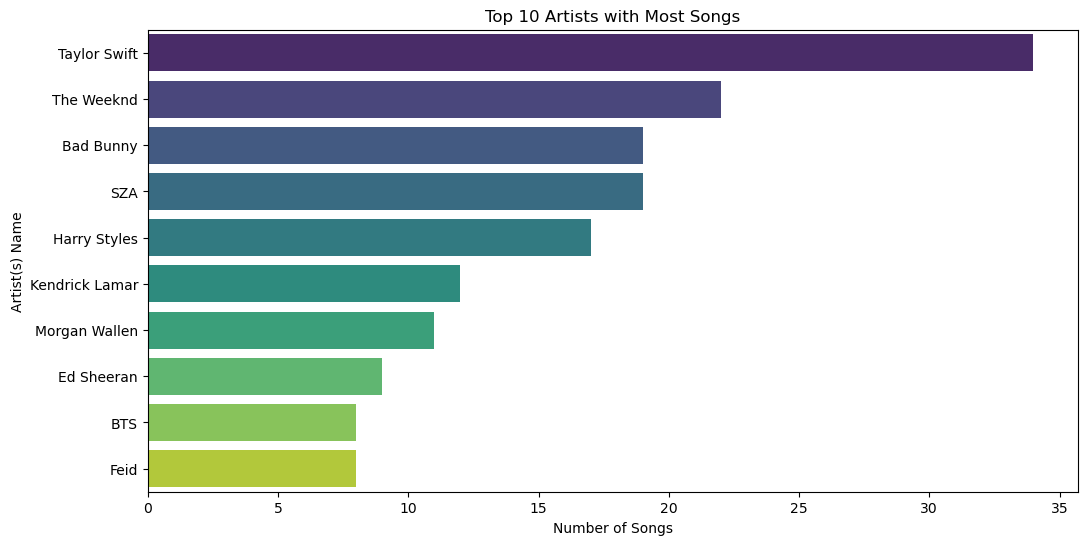

Taylor Swift      34
The Weeknd        22
Bad Bunny         19
SZA               19
Harry Styles      17
Kendrick Lamar    12
Morgan Wallen     11
Ed Sheeran         9
BTS                8
Feid               8
Name: artist(s)_name, dtype: int64

In [35]:
# Top 10 artists with most songs in the dataset
top_artists = df['artist(s)_name'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.xlabel('Number of Songs')
plt.ylabel('Artist(s) Name')
plt.title('Top 10 Artists with Most Songs')
plt.show()

top_artists

Here are the top 10 artists with the most songs in the dataset:

Taylor Swift: 34 songs

The Weeknd: 22 songs

Bad Bunny: 19 songs

SZA: 19 songs

Harry Styles: 17 songs

Kendrick Lamar: 12 songs

Morgan Wallen: 11 songs

Ed Sheeran: 9 songs

BTS: 8 songs

Feid: 8 songs

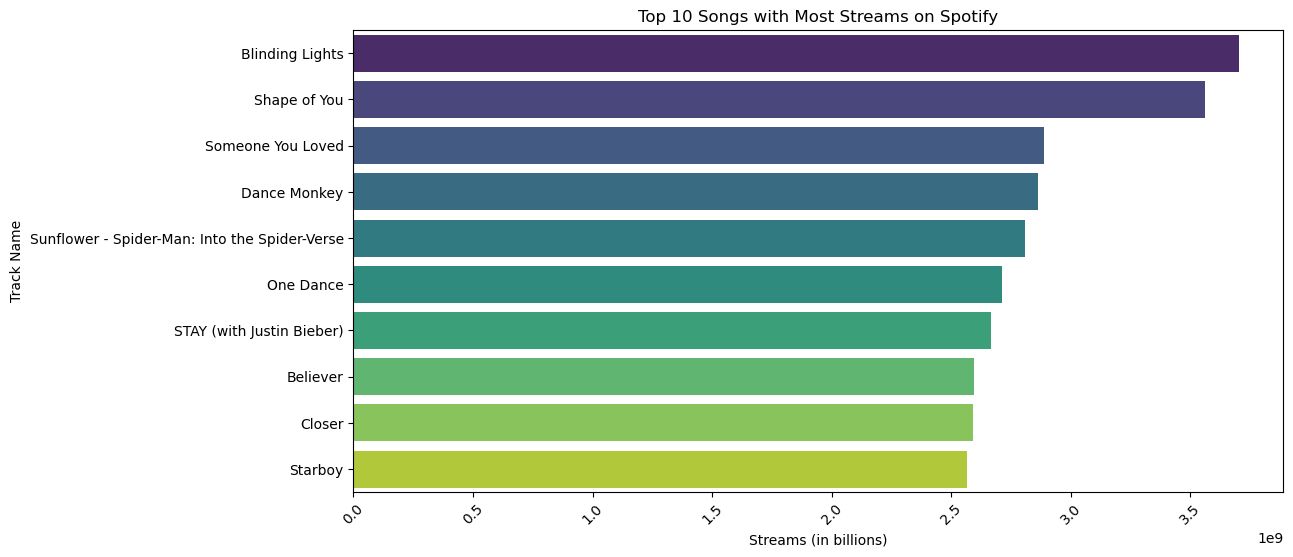

In [36]:
# Top 10 songs with most streams on Spotify
top_spotify_streams = df[['track_name', 'artist(s)_name', 'streams']].sort_values(by='streams', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_spotify_streams['streams'], y=top_spotify_streams['track_name'], palette='viridis')
plt.xlabel('Streams (in billions)')
plt.ylabel('Track Name')
plt.title('Top 10 Songs with Most Streams on Spotify')
plt.xticks(rotation=45)
plt.show()



Here are the top 10 songs with the most streams on Spotify:

"Blinding Lights" by The Weeknd: ~3.70 billion streams

"Shape of You" by Ed Sheeran: ~3.56 billion streams

"Someone You Loved" by Lewis Capaldi: ~2.89 billion streams

"Dance Monkey" by Tones and I: ~2.86 billion streams

"Sunflower - Spider-Man: Into the Spider-Verse" by Post Malone, Swae Lee: ~2.81 billion streams

"One Dance" by Drake, WizKid, Kyla: ~2.71 billion streams

"STAY (with Justin Bieber)" by Justin Bieber, The Kid Laroi: ~2.67 billion streams

"Believer" by Imagine Dragons: ~2.59 billion streams

"Closer" by The Chainsmokers, Halsey: ~2.59 billion streams

"Starboy" by The Weeknd, Daft Punk: ~2.57 billion streams

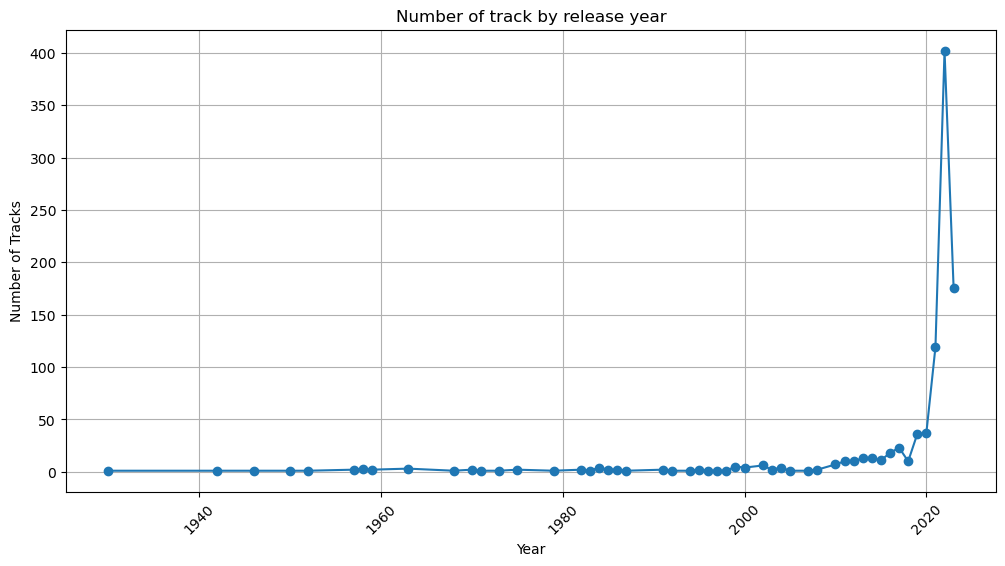

In [37]:
# Grouping the data by release year and counting the number of tracks per year
releases_per_year = df.groupby('released_year').size()

# Visualization for the number of releases per year
plt.figure(figsize=(12, 6))
releases_per_year.plot(kind='line', marker='o')
plt.title('Number of track by release year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

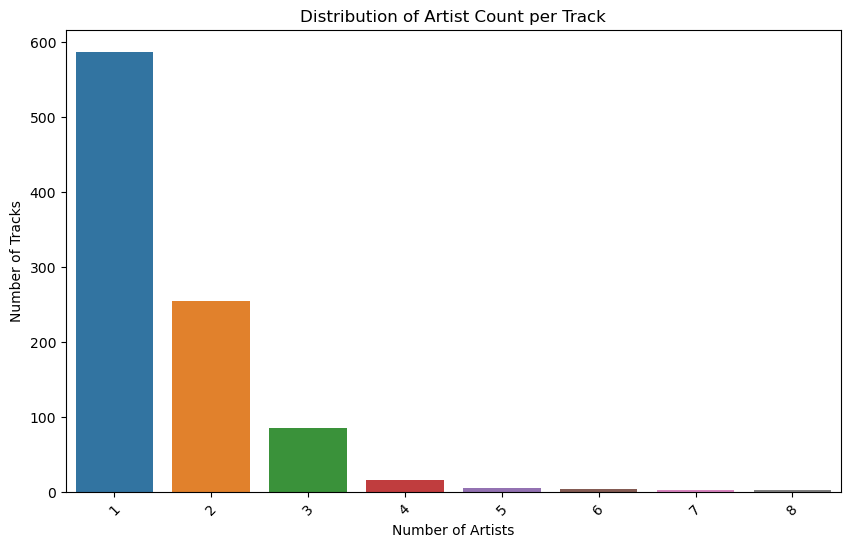

In [38]:
# Visualization for the distribution of artist_count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='artist_count')
plt.title('Distribution of Artist Count per Track')
plt.xlabel('Number of Artists')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.show()

### Insight 1

In [39]:
# Check current columns in the DataFrame
print(df.columns)

# If 'released_date' is not in df.columns, create the column
if 'released_date' not in df.columns:
    try:
        df['released_date'] = pd.to_datetime(df['released_year'].astype(str) + '-' + 
                                             df['released_month'].astype(str) + '-' + 
                                             df['released_day'].astype(str), format='%Y-%m-%d')
        print('released_date column created successfully.')
    except Exception as e:
        print('An error occurred:', e)


Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')
released_date column created successfully.


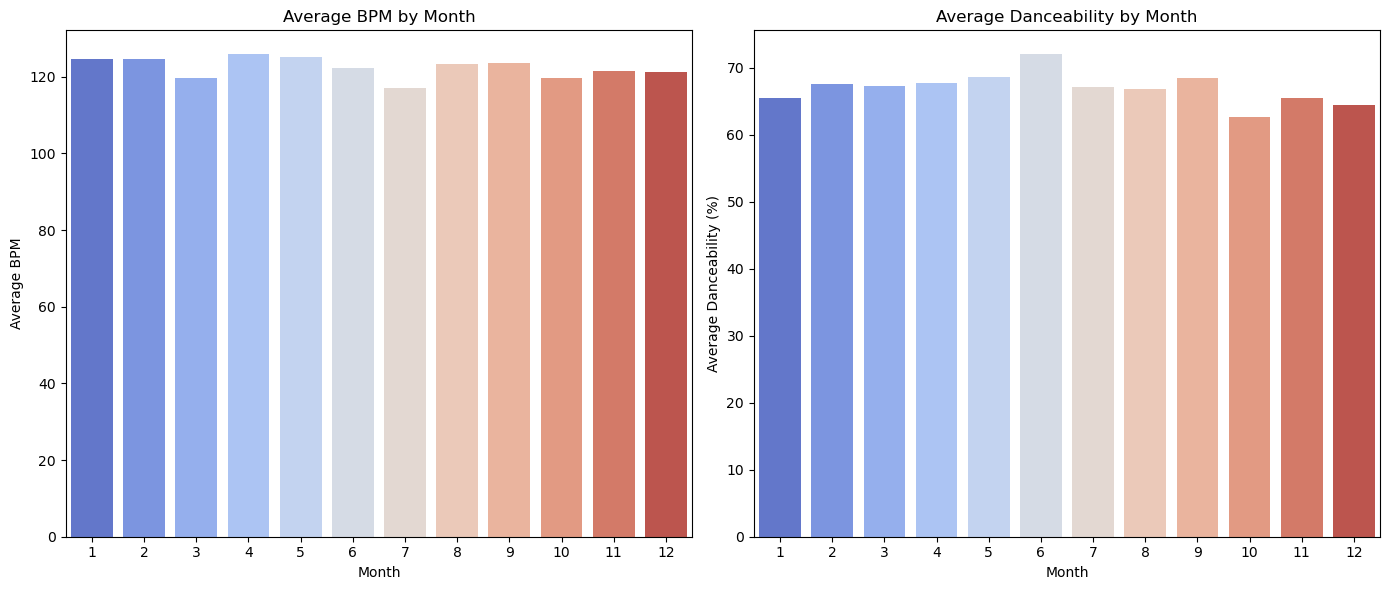

,season,bpm,danceability_%
0,Autumn,121.580292,65.504101
1,Spring,123.451180,67.835848
2,Summer,120.862993,68.630962
3,Winter,123.475155,65.813619


In [40]:
# Extract release_month from released_date
df['release_month'] = df['released_date'].dt.month

# Grouping the data by release_month and calculating average BPM and danceability
monthly_bpm_danceability = df.groupby('release_month').agg({'bpm':'mean', 'danceability_%':'mean'}).reset_index()

# Mapping months to seasons for better interpretation (Northern Hemisphere)
# December to February: Winter, March to May: Spring, June to August: Summer, September to November: Autumn
month_to_season = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 
                   6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'}
monthly_bpm_danceability['season'] = monthly_bpm_danceability['release_month'].map(month_to_season)

# Visualizing the data
plt.figure(figsize=(14, 6))

# BPM by Month
plt.subplot(1, 2, 1)
sns.barplot(data=monthly_bpm_danceability, x='release_month', y='bpm', palette='coolwarm')
plt.title('Average BPM by Month')
plt.xlabel('Month')
plt.ylabel('Average BPM')

# Danceability by Month
plt.subplot(1, 2, 2)
sns.barplot(data=monthly_bpm_danceability, x='release_month', y='danceability_%', palette='coolwarm')
plt.title('Average Danceability by Month')
plt.xlabel('Month')
plt.ylabel('Average Danceability (%)')

plt.tight_layout()
plt.show()

# Displaying the data by season for comparison
seasonal_bpm_danceability = monthly_bpm_danceability.groupby('season').agg({'bpm':'mean', 'danceability_%':'mean'}).reset_index()
seasonal_bpm_danceability


Interpretation:

BPM: There isn't a significant difference in BPM across the seasons, contradicting the hypothesis that summer songs would have a notably higher BPM. Spring and Winter have slightly higher average BPMs compared to Summer and Autumn.

Danceability: Summer songs do show a slightly higher average danceability percentage, which could indicate a preference for more danceable tracks during the summer. However, the difference is not very pronounced.

In conclusion, while there's a slight tendency for summer songs to be more danceable, the variations in BPM and danceability percentages across seasons are relatively subtle, suggesting that these characteristics are not strongly season-dependent based on this dataset.

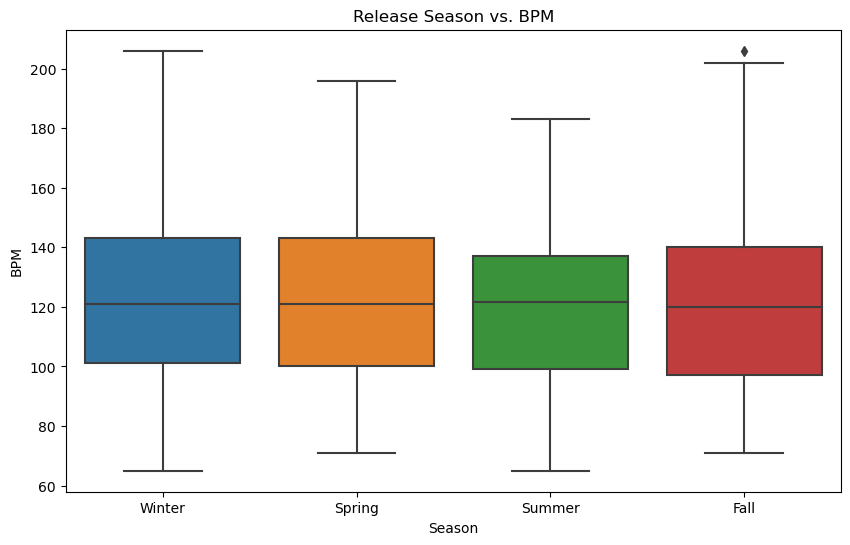

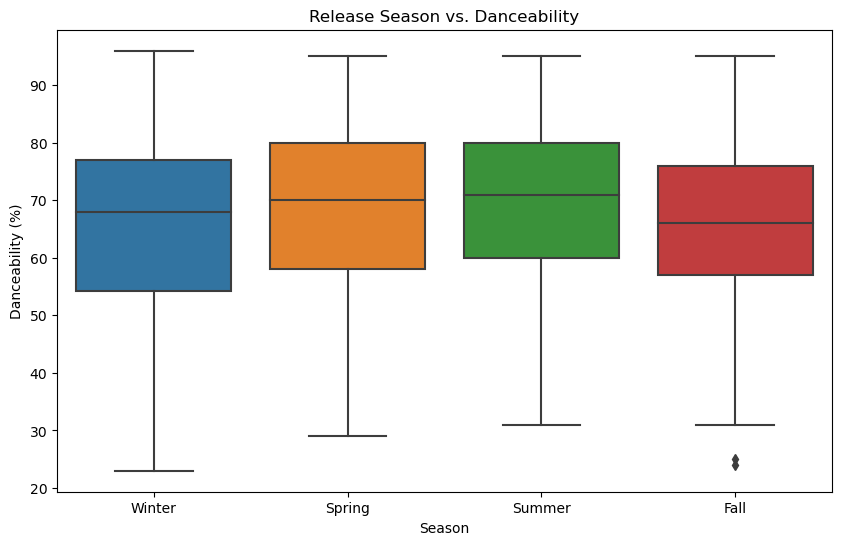

In [41]:
# Reload the dataset
# Define a mapping of months to seasons
seasons = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

# Map the release month to seasons
df['season'] = df['released_month'].map(seasons)

# Plotting release month (seasons) vs. bpm
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='season', y='bpm', order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title('Release Season vs. BPM')
plt.xlabel('Season')
plt.ylabel('BPM')
plt.show()

# Plotting release month (seasons) vs. danceability
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='season', y='danceability_%', order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title('Release Season vs. Danceability')
plt.xlabel('Season')
plt.ylabel('Danceability (%)')
plt.show()

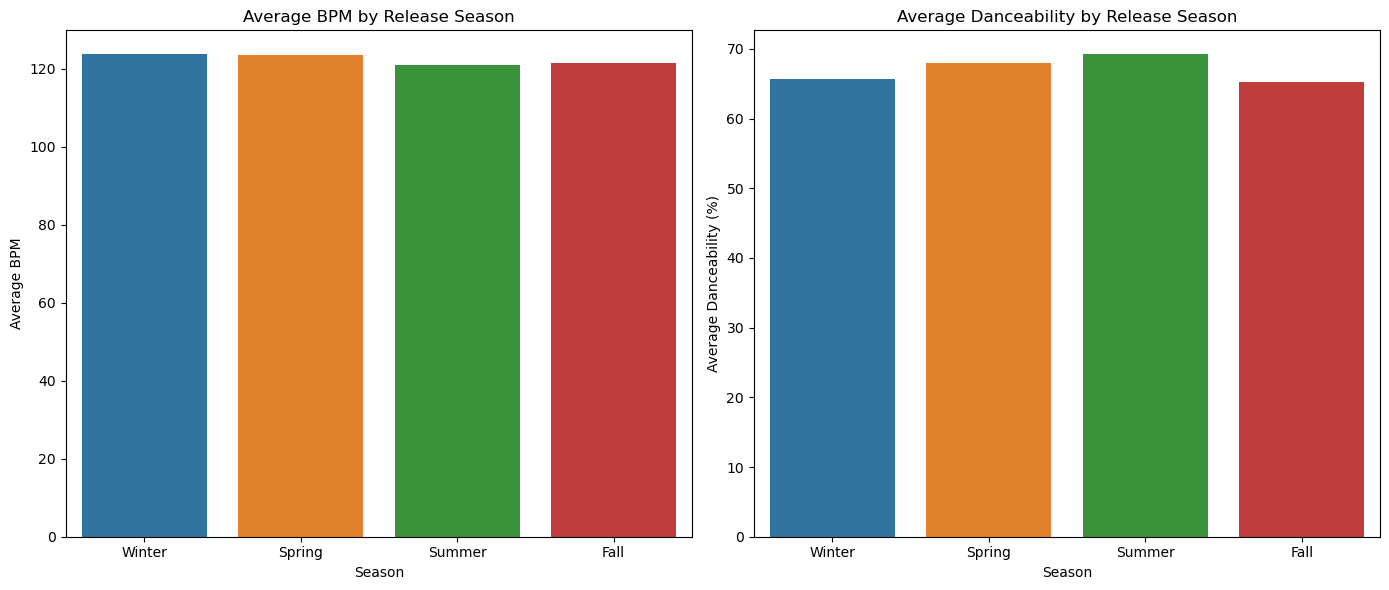

In [42]:
# Prepare the data for bar plots by calculating the mean BPM and danceability for each season
seasonal_bpm_means = df.groupby('season')['bpm'].mean().reindex(['Winter', 'Spring', 'Summer', 'Fall'])
seasonal_danceability_means = df.groupby('season')['danceability_%'].mean().reindex(['Winter', 'Spring', 'Summer', 'Fall'])

# Create bar plots
plt.figure(figsize=(14, 6))

# Bar plot for release season vs. average BPM
plt.subplot(1, 2, 1)
sns.barplot(x=seasonal_bpm_means.index, y=seasonal_bpm_means.values)
plt.title('Average BPM by Release Season')
plt.xlabel('Season')
plt.ylabel('Average BPM')

# Bar plot for release season vs. average danceability
plt.subplot(1, 2, 2)
sns.barplot(x=seasonal_danceability_means.index, y=seasonal_danceability_means.values)
plt.title('Average Danceability by Release Season')
plt.xlabel('Season')
plt.ylabel('Average Danceability (%)')

plt.tight_layout()
plt.show()

### Insight 2


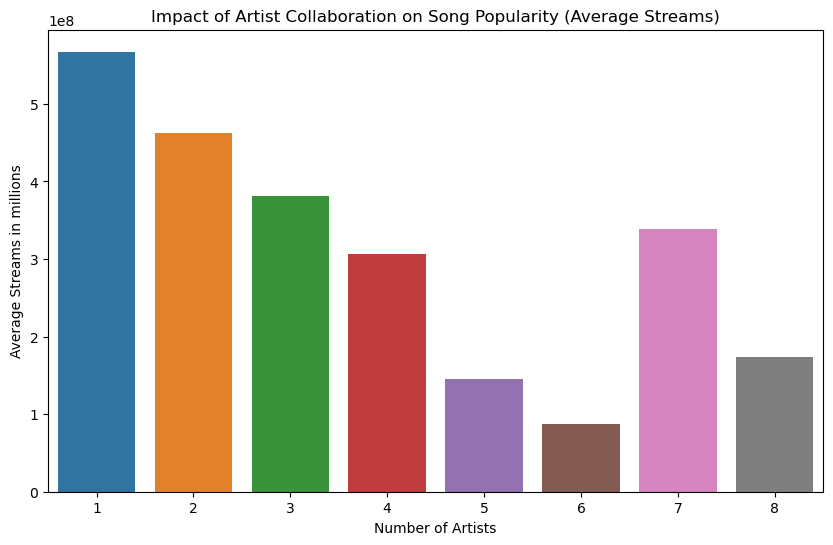

In [43]:
collaboration_impact = df.groupby('artist_count')['streams'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=collaboration_impact, x='artist_count', y='streams')
plt.title('Impact of Artist Collaboration on Song Popularity (Average Streams)')
plt.xlabel('Number of Artists')
plt.ylabel('Average Streams in millions')
plt.show()

Here's the analysis of average streams based on artist contribution:

- Songs with a solo artist have the highest average streams.

- Collaborations involving two artists (duos) come next in terms of average streams.

- Interestingly, songs involving three artists (trios) or more see a decline in average streams.

This suggests that while collaborations can be popular, very large collaborations may not always lead to higher streams.

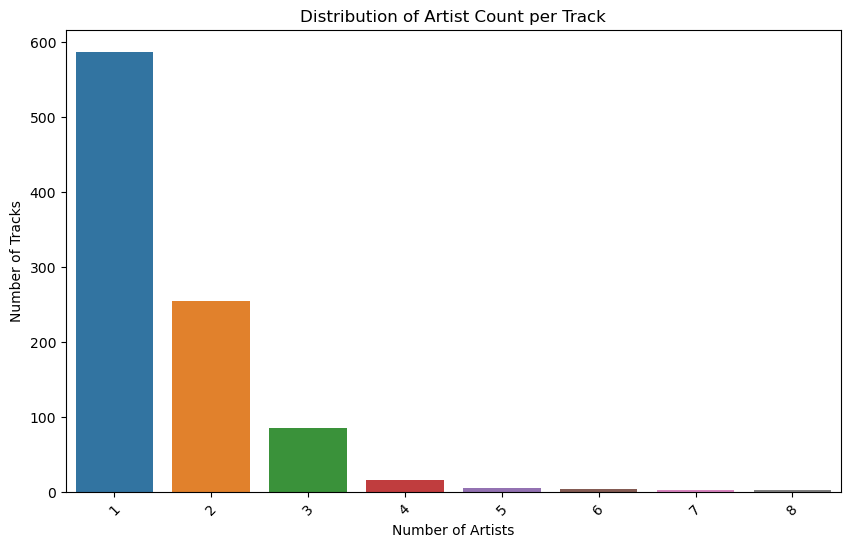

In [44]:
# Visualization for the distribution of artist_count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='artist_count')
plt.title('Distribution of Artist Count per Track')
plt.xlabel('Number of Artists')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.show()

In [45]:

#Calculating the number of tracks for each number of artists (from 1 to 8)
tracks_per_artist_count = df.groupby('artist_count').size().reset_index(name='number_of_tracks')

# Filtering for artist counts from 1 to 8
tracks_per_artist_count_filtered = tracks_per_artist_count[tracks_per_artist_count['artist_count'].between(1, 8)]

tracks_per_artist_count_filtered

,artist_count,number_of_tracks
0,1,587
1,2,254
2,3,85
3,4,15
4,5,5
5,6,3
6,7,2
7,8,2


In [46]:
# Filtering the dataset for songs with 7 and 8 artists
songs_with_7_and_8_artists = df[df['artist_count'].isin([7, 8])][['track_name', 'artist(s)_name', 'streams']]

songs_with_7_and_8_artists

,track_name,artist(s)_name,streams
35,Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK,...",123122413
506,We Don't Talk About Bruno,"Adassa, Mauro Castillo, Stephanie Beatriz, Enc...",432719968
642,Se Le Ve,"Arcangel, De La Ghetto, Justin Quiles, Lenny T...",223319934
667,"Cay?????? La Noche (feat. Cruz Cafun??????, Ab...","Quevedo, La Pantera, Juseph, Cruz Cafun??????,...",245400167


### Insight 3


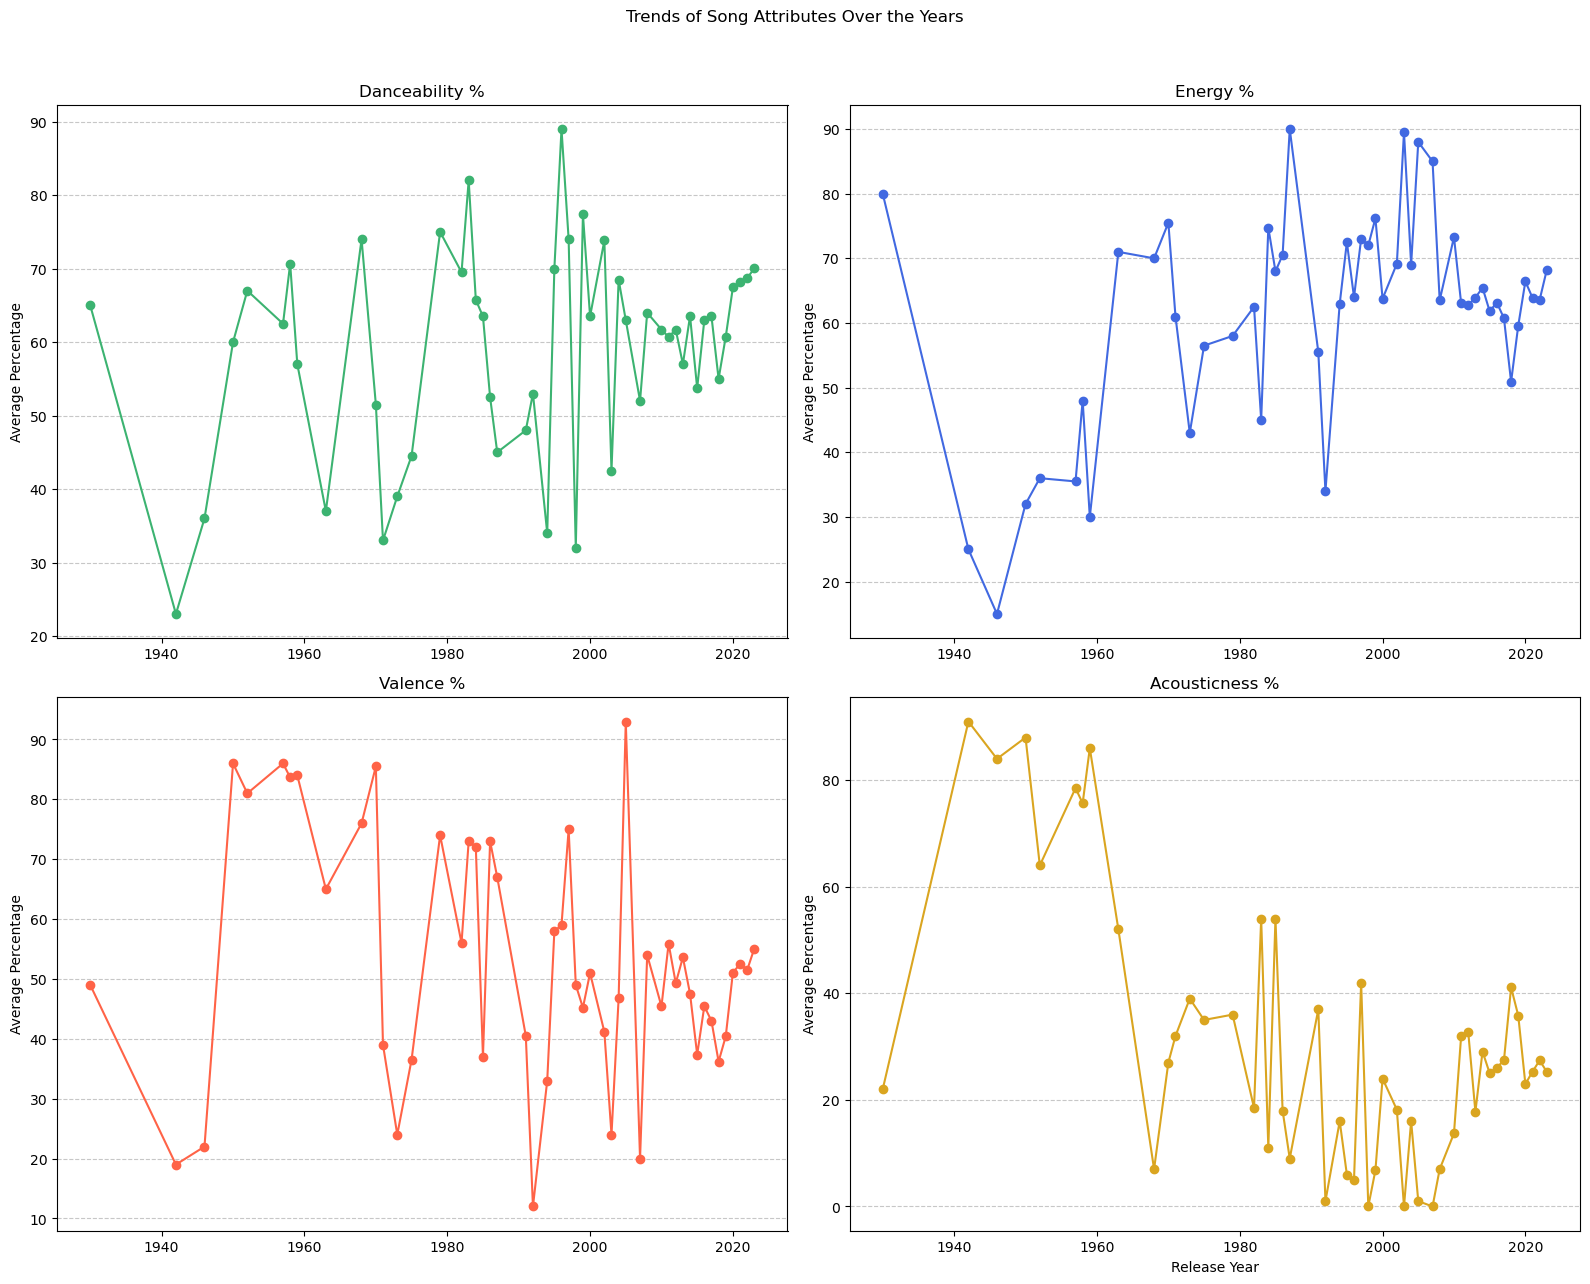

In [49]:
# Grouping by release year and computing average for the selected attributes
attributes_by_year = df.groupby('released_year')[['danceability_%', 'energy_%', 'valence_%', 'acousticness_%']].mean()
# Creating a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# List of attributes and their respective colors for plotting
attributes_colors = [('danceability_%', 'mediumseagreen'), ('energy_%', 'royalblue'), 
                     ('valence_%', 'tomato'), ('acousticness_%', 'goldenrod')]

# Looping through each attribute and plotting it on a respective subplot
for ax, (attribute, color) in zip(axes.ravel(), attributes_colors):
    ax.plot(attributes_by_year.index, attributes_by_year[attribute], color=color, marker='o')
    ax.set_ylabel('Average Percentage')
    ax.set_title(attribute.replace('_', ' ').title())
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.xlabel('Release Year')
plt.suptitle('Trends of Song Attributes Over the Years', y=1.05)
plt.show()

- **Technological Influence**: 
  - Decreased acousticness from the 1940s to the 2000s indicates a shift from acoustic to electronic music production.
  - Increase in energy and danceability aligns with advancements in music technology.

- **Cultural and Genre Trends**:
  - Peaks in danceability and energy in the 1990s and 2000s correspond with the popularity of dance and electronic genres.
  - Valence reflects the cultural mood swings, with upbeat music from the disco and funk era standing out.

- **Post-2000s Diversification**:
  - Stabilization in danceability and a slight decline in energy suggest a broader range of music styles gaining popularity.
  - The music industry's diversification is likely influenced by digital platforms, allowing for varied musical tastes.

- **General Observations**:
  - Music trends have oscillated over the decades, with a general movement towards more rhythmic and energetic compositions.
  - The industry shows responsiveness to listener preferences, technological capabilities, and cultural movements.
  - Overall, there's an adaptability among artists and producers to create music that resonates with the changing dynamics of listener consumption.

### Insight 4

Analyzing the Impact of Musical Key on Song Popularity and Mood Metrics

The objective of Insight 4 was to investigate whether there's a correlation between the musical key of a song and its popularity, as well as its perceived mood. This was achieved through a two-part analysis focusing on the top 10 and last 10 songs from a dataset based on streaming counts.

Top 10 Songs Analysis:

We started by identifying the top 10 most streamed songs and analyzing their musical keys. The analysis revealed that 'C#' was the most prevalent key among these hits.
To delve deeper, we constructed an "Average Mood Metric" by averaging the values of valence, energy, and danceability for these songs. The boxplot of this metric for songs in 'C#' showed an average mood score around 63, suggesting a certain mood profile associated with the most popular tracks.

Last 10 Songs Analysis:

We then applied the same methodology to the last 10 songs in the dataset, which revealed 'B' as the most prevalent key among these tracks.
The Average Mood Metric for these 'B' key songs showed an average around 67 in the boxplot analysis, slightly higher than that of the top 10 songs.

Conclusion:
The analysis suggests that the musical key and the Average Mood Metric of a song have no significant influence on its streaming success. Despite the top 10 most streamed songs having a slightly lower average mood metric compared to the least streamed songs, the difference is not substantial enough to conclude that mood or key directly impacts listener preference. This insight challenges common assumptions about musical attributes driving song popularity, indicating that other factors may play a more crucial role in influencing listener choices.

In [50]:
top_10_popular_songs = df.nlargest(10,'streams')

In [51]:
top_10_popular_songs[['track_name', 'artist(s)_name', 'key','streams']]

,track_name,artist(s)_name,key,streams
55,Blinding Lights,The Weeknd,C#,3703895074
179,Shape of You,Ed Sheeran,C#,3562543890
86,Someone You Loved,Lewis Capaldi,C#,2887241814
620,Dance Monkey,Tones and I,F#,2864791672
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",D,2808096550
162,One Dance,"Drake, WizKid, Kyla",C#,2713922350
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",C#,2665343922
140,Believer,Imagine Dragons,A#,2594040133
725,Closer,"The Chainsmokers, Halsey",G#,2591224264
48,Starboy,"The Weeknd, Daft Punk",G,2565529693


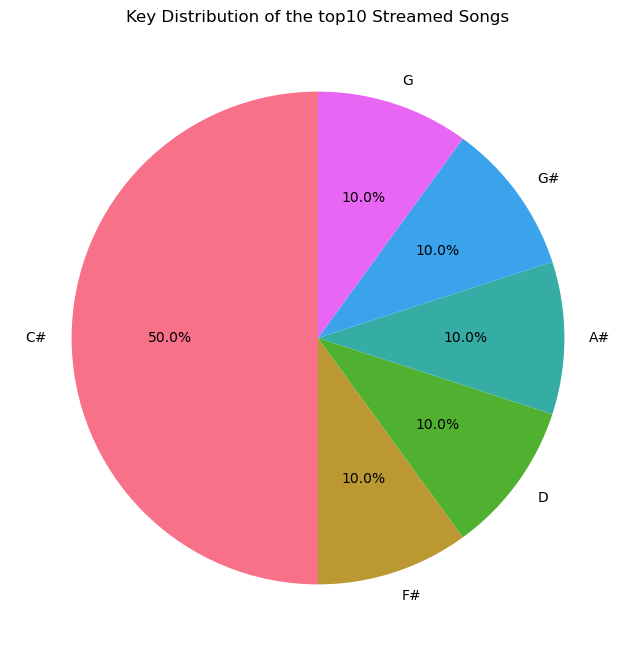

In [52]:
# Data
keys = ['C#', 'C#', 'C#', 'F#', 'D', 'C#', 'C#', 'A#', 'G#', 'G']

# Convert the list to a pandas series
key_series = pd.Series(keys)

# Get the count of each key
key_counts = key_series.value_counts()

# Generate the color palette
colors = sns.color_palette("husl", len(key_counts))

# Plot the pie chart
plt.figure(figsize=(10, 8))
key_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Key Distribution of the top10 Streamed Songs')
plt.ylabel('')  # Hide the y-label as it's not needed for pie charts
plt.show()

/var/folders/4m/f95t0y2d3_3900_jgscm33980000gn/T/ipykernel_51463/1222959131.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_sharp_songs['Average_Mood_Metric'] = c_sharp_songs[['valence_%', 'energy_%', 'danceability_%']].mean(axis=1)


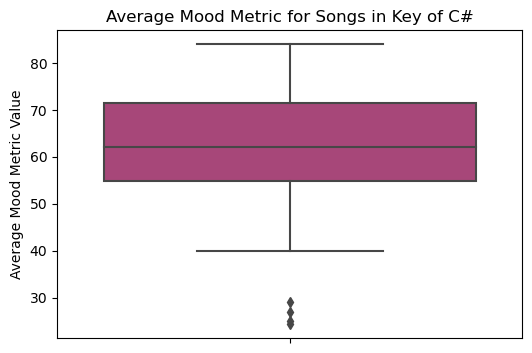

In [77]:
# Filter the DataFrame for songs in the key of C#
c_sharp_songs = df[df['key'] == 'C#']

# Calculate the Average Mood Metric for these songs
c_sharp_songs['Average_Mood_Metric'] = c_sharp_songs[['valence_%', 'energy_%', 'danceability_%']].mean(axis=1)

# Now you can plot the average mood metric for songs in the key of C#
plt.figure(figsize=(6, 4))
sns.boxplot(data=c_sharp_songs, y='Average_Mood_Metric', palette="magma")
plt.title('Average Mood Metric for Songs in Key of C#')
plt.ylabel('Average Mood Metric Value')
plt.show()


                                 track_name  \
123                             Que Vuelvas   
393                       Jhoome Jo Pathaan   
144                                   QUEMA   
142             Gol Bolinha, Gol Quadrado 2   
68                                Overdrive   
58                                      S91   
30                                     Rush   
248          Danger (Spider) (Offset & JID)   
104                               New Jeans   
193  Better Than Revenge (Taylor's Version)   

                                        artist(s)_name  key   streams  
123                         Carin Leon, Grupo Frontera   A#      2762  
393  Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...    G   1365184  
144                       Sog, Ryan Castro, Peso Pluma  NaN  11599388  
142                                Mc Pedrinho, DJ 900    B  11956641  
68                                         Post Malone   C#  14780425  
58                                             Kar

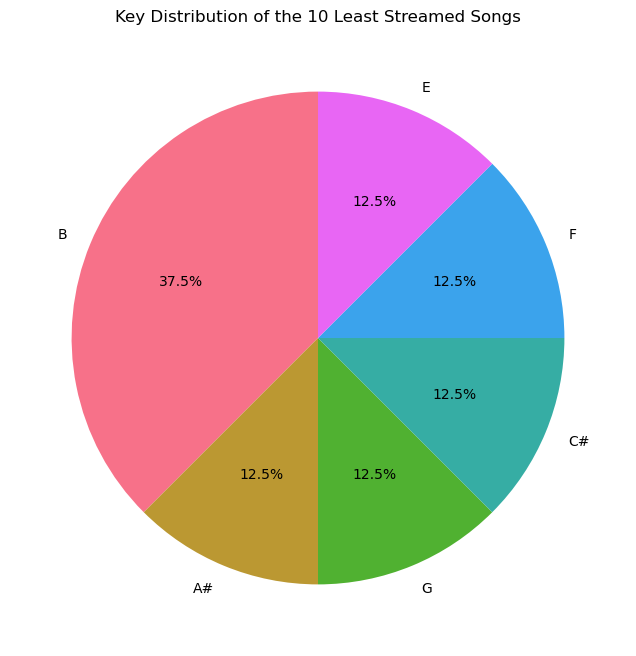

In [83]:
# Filter out songs with 'UNKNOWN' key or 0 streams
filtered_df = df[(df['key'] != 'Unknown') & (df['streams'] > 0)]

# Find the 10 least streamed songs, excluding 'UNKNOWN' keys and 0 streams
least_streamed_songs = filtered_df.nsmallest(10, 'streams')

# Display the 10 least streamed songs for reference
print(least_streamed_songs[['track_name', 'artist(s)_name', 'key', 'streams']])

# Create a pie chart of the keys for the least streamed songs
key_distribution = least_streamed_songs['key'].value_counts()
colors = sns.color_palette("husl", len(key_distribution))
plt.figure(figsize=(10, 8))
key_distribution.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Key Distribution of the 10 Least Streamed Songs')
plt.ylabel('')  # Hide the y-label as it's not informative for pie charts
plt.show()


/var/folders/4m/f95t0y2d3_3900_jgscm33980000gn/T/ipykernel_51463/1234217294.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B_songs['Average_Mood_Metric'] = B_songs[['valence_%', 'energy_%', 'danceability_%']].mean(axis=1)


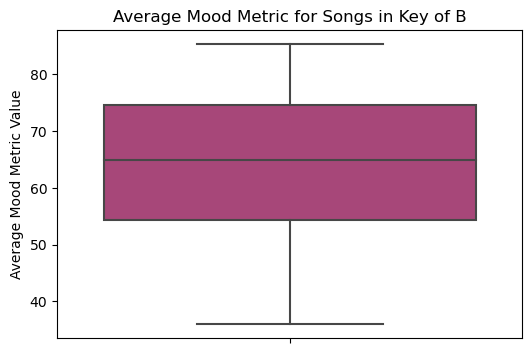

In [78]:
# Filter the DataFrame for songs in the key of C#
B_songs = df[df['key'] == 'B']

# Calculate the Average Mood Metric for these songs
B_songs['Average_Mood_Metric'] = B_songs[['valence_%', 'energy_%', 'danceability_%']].mean(axis=1)

# Now you can plot the average mood metric for songs in the key of C#
plt.figure(figsize=(6, 4))
sns.boxplot(data=B_songs, y='Average_Mood_Metric', palette="magma")
plt.title('Average Mood Metric for Songs in Key of B')
plt.ylabel('Average Mood Metric Value')
plt.show()

In [80]:
print(f"Mean Mood Metric for Songs in Key of B: {avg_mood_metric_b}")
print(f"Median Mood Metric for Songs in Key of B: {B_songs['Average_Mood_Metric'].median()}")
print(f"Skewness for Mood Metric in Key of B: {B_songs['Average_Mood_Metric'].skew()}")


Mean Mood Metric for Songs in Key of B: 63.6954732510288
Median Mood Metric for Songs in Key of B: 65.0
Skewness for Mood Metric in Key of B: -0.43439980084994473


In [82]:
mean_mood_metric_c_sharp = c_sharp_songs['Average_Mood_Metric'].mean()
median_mood_metric_c_sharp = c_sharp_songs['Average_Mood_Metric'].median()
skewness_mood_metric_c_sharp = c_sharp_songs['Average_Mood_Metric'].skew()



print(f'Mean Mood Metric for Songs in Key of C#: {mean_mood_metric_c_sharp}')
print(f'Median Mood Metric for Songs in Key of C#: {median_mood_metric_c_sharp}')
print(f'Skewness for Mood Metric in Key of C#: {skewness_mood_metric_c_sharp}')

Mean Mood Metric for Songs in Key of C#: 61.661111111111104
Median Mood Metric for Songs in Key of C#: 62.0
Skewness for Mood Metric in Key of C#: -0.5662922735197835


In [55]:
# Filter out songs with 'UNKNOWN' key or 0 streams
filtered_df = df[(df['key'] != 'Unknown') & (df['streams'] > 0)]

# Find the 10 least streamed songs, excluding 'UNKNOWN' keys and 0 streams
least_streamed_songs = filtered_df.nsmallest(10, 'streams')

# Display the 10 least streamed songs for reference
least_streamed_songs[['track_name', 'artist(s)_name', 'key', 'streams']]

,track_name,artist(s)_name,key,streams
123,Que Vuelvas,"Carin Leon, Grupo Frontera",A#,2762
393,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",G,1365184
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",B,11956641
68,Overdrive,Post Malone,C#,14780425
30,Rush,Troye Sivan,F,22581161
248,Danger (Spider) (Offset & JID),"Offset, JID",B,24975653
104,New Jeans,NewJeans,E,29562220
193,Better Than Revenge (Taylor's Version),Taylor Swift,B,30343206
150,Mi Bello Angel,Natanael Cano,A,31873544
577,Phantom Regret by Jim,The Weeknd,A,31959571


# Insight 5